# Introduction to CPTAC and Proteomics

This document will take you through the basics of CPTAC and analyzing proteomic data in python. Let's get started!

## Setting up your working directory

Set your working directory to your analysis_data folder.

In [3]:
import os

os.chdir('/Users/danasouter/desktop/qbio490/qbio_490_dana/analysis_data')


### Start exploring CPTAC with `cptac`
Similar to TCGAbiolinks, we need to load the package and download the data before using.
1. Import the package (`cptac`).
2. Look at the data sets available to us with the list_datasets() function. As a reminder, remember the package_name.method() syntax!
3. Download the cancer you'll be working with. 
4. Load it into our python environment.

In [6]:
# 1. Import cptac
import cptac

# 2. Examine the data sets available with list_datasets()
cptac.list_datasets()

,Description,Data reuse status,Publication link
Dataset name,,,
Brca,breast cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33212010/
Ccrcc,clear cell renal cell carcinoma (kidney),no restrictions,https://pubmed.ncbi.nlm.nih.gov/31675502/
Colon,colorectal cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/31031003/
Endometrial,endometrial carcinoma (uterine),no restrictions,https://pubmed.ncbi.nlm.nih.gov/32059776/
Gbm,glioblastoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33577785/
Hnscc,head and neck squamous cell carcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33417831/
Lscc,lung squamous cell carcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/34358469/
Luad,lung adenocarcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/32649874/
Ovarian,high grade serous ovarian cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/27372738/


In [7]:
# 3. Download the cancer data set -- fill in dataset!
#cptac.download(dataset="FILL IN HERE")
cptac.download(dataset="brca")


# 4. Load the cancer data
# ie. brca = cptac.Brca
brca = cptac.Brca()


Now, we have our object containing a bunch of data. We can use the list_data() function the data available for the cancer dataset.
<br></br>
In addition to the proteomics data, we can also accesss the accompanying transcriptomics, CNV, etc. using this object. We will focus on the omics which we have already seen for this course; however, other data present in this dataset are also pretty interesting. Finally, many proteins can't be identified very well, so they won't appear as a column (for example, APC isn't in the proteomics data set).
<br></br>
**Exercise 1.1** Call the list_data() function from the object to examine the different data contained in the object. Much like calling functions from a package, we can use the cancer.function() syntax.

* How many patients do you think there are in this dataset? (Make an educated guess about this from the dimensions - we'll confirm your answer later on)

In [8]:
# Run the list_data() function
brca.list_data()


Below are the dataframes contained in this dataset and their dimensions:

acetylproteomics
	122 rows
	9868 columns
clinical
	122 rows
	18 columns
CNV
	122 rows
	23692 columns
derived_molecular
	122 rows
	36 columns
phosphoproteomics
	122 rows
	38775 columns
proteomics
	122 rows
	10107 columns
somatic_mutation
	24106 rows
	3 columns
transcriptomics
	122 rows
	23121 columns


**Exercise 1.2** Use the get_proteomics() function to store the proteomics data into a new data frame.

In [13]:
protein_data = brca.get_proteomics()  # get the proteomics data
protein_data # view the data


# Uncomment and run this command after you get the data, you don't really need to know what it does but it collapses
# the column names and gets rid of the database_IDs which will make our lives much easier!

protein_data.columns = protein_data.columns.get_level_values(0) 


## (2) Exploring the Data

As mentioned earlier, `cptac` data is in the form of `pandas` dataframes. Let's load that and `numpy`. 

**Exercise 2.1** Import numpy and pandas with their usual shortened names (pd and np).

In [15]:
# import packages here
import numpy as np
import pandas as pd

Remember that we can access the rows/column names of a data frame in two ways:
1. We can get the row and column names together in a list with the `axes` attribute.
2. We can get the row or column names individually in the `index` (row) or `columns` (column) attribute.
<br></br>
**Exercise 2.2** Print the axes, index, and columns of the protein_data object. Then, determine its dimensions using the shape attribute. Finally, answer the following questions:

* How many rows and columns are there in the data frame?
* What do the rows and columns represent?
* How many patients are there?
* What about proteins?

In [18]:
## Explore the data frame here and answer questions

#Number of rows: 122
#Number of columns: 10107
#Number of patients: 122
#Number of proteins: 10107

print("Axes:", protein_data.axes)
print("Index (rows):", protein_data.index)
print("Columns:", protein_data.columns)

num_rows, num_columns = protein_data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

# What do the rows and columns represent?
#Rows represent patients and columns represent proteins.

num_patients = num_rows
print("Number of patients:", num_patients)

num_proteins = num_columns
print("Number of proteins:", num_proteins)


Axes: [Index(['CPT000814', 'CPT001846', 'X01BR001', 'X01BR008', 'X01BR009',
       'X01BR010', 'X01BR015', 'X01BR017', 'X01BR018', 'X01BR020',
       ...
       'X20BR002', 'X20BR005', 'X20BR006', 'X20BR007', 'X20BR008', 'X21BR001',
       'X21BR002', 'X21BR010', 'X22BR005', 'X22BR006'],
      dtype='object', name='Patient_ID', length=122), Index(['A1BG', 'A2M', 'A2ML1', 'AAAS', 'AACS', 'AADAT', 'AAED1', 'AAGAB',
       'AAK1', 'AAMDC',
       ...
       'ZSCAN31', 'ZSWIM8', 'ZW10', 'ZWILCH', 'ZWINT', 'ZXDC', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', name='Name', length=10107)]
Index (rows): Index(['CPT000814', 'CPT001846', 'X01BR001', 'X01BR008', 'X01BR009',
       'X01BR010', 'X01BR015', 'X01BR017', 'X01BR018', 'X01BR020',
       ...
       'X20BR002', 'X20BR005', 'X20BR006', 'X20BR007', 'X20BR008', 'X21BR001',
       'X21BR002', 'X21BR010', 'X22BR005', 'X22BR006'],
      dtype='object', name='Patient_ID', length=122)
Columns: Index(['A1BG', 'A2M', 'A2ML1', 'AAA

Remember we can access data by name using `.loc[]` and `.iloc[]`. Since this dataset is really large, we won't really use `.iloc[]` which accesses by index. To get the protein expression information for a specific patient, therefore, we would run something like this: 

In [ ]:
protein_data.loc["patient ID","protein name"] # this is the general case, you have to fill in actual IDs/protein names

**Exercise 2.3** Remember that the numerical data in CPTAC is the relative fold change, not an absolute value/count. Given this, what kind of number would represent lower relative expression? What kind of number would represent higher relative expression? (Hint: reference level is 0) 

In [ ]:
## Answer question in comment form here
#Negative values indicate lower expression and positive values indicate higher expression.

**Exericse 2.4**

Print the relative fold change of 5th patient in the `TP53` protein. Then, interpret this value -- does this patient have higher or lower protein levels than the reference? (Hint: use .loc[] and remember that a `:` can be used in either the row or column slot to access every row or every column.)


In [19]:
## write code here
fold_change_5th_patient_TP53 = protein_data.loc["X01BR009", "TP53"]

if fold_change_5th_patient_TP53 < 0:
    print("The 5th patient has lower protein levels of TP53 compared to the reference.")
elif fold_change_5th_patient_TP53 > 0:
    print("The 5th patient has higher protein levels of TP53 compared to the reference.")
else:
    print("The 5th patient has similar protein levels of TP53 compared to the reference.")


The 5th patient has higher protein levels of TP53 compared to the reference.


### Using Boolean indexing

In R, we used the `ifelse()` function very heavily to assign categories, such as classifying patients as "old" or "young". In Python, we have the `where(COND, TRUE_VAL, FALSE_VAL)` function from numpy, which works extremely similarly to ifelse(). That is:

   1. The first parameter is the condition (a boolean vector; i.e. Trues and Falses).
   2. The second parameter is the value to fill the True conditions.
   3. The third parameter is the value to fil lthe False conditions.
    
The following example (split into the four code blocks below) shows how to apply the `where()` function, in the context of telling if a number is odd or even.

In [20]:
# first let's create our example array

number_example_array = pd.DataFrame({"nums": [0, 1, 2, 3, 4, 5]})
number_example_array

,nums
0,0
1,1
2,2
3,3
4,4
5,5


In [21]:
# now, let's make a boolean vector where odds will be True, evens will be False
boolean_vector = (number_example_array % 2 == 1)
boolean_vector

,nums
0,False
1,True
2,False
3,True
4,False
5,True


In [22]:
# then add this vector as a column in our array (we could do this and the above in one step)
number_example_array["boolean_vector"] = boolean_vector
number_example_array

,nums,boolean_vector
0,0,False
1,1,True
2,2,False
3,3,True
4,4,False
5,5,True


In [23]:
# lastly, let's add a third column called "parity" that says based off of "boolean_vector" if our value is odd/even
number_example_array["parity"] = np.where(boolean_vector, "Odd", "Even")
number_example_array

,nums,boolean_vector,parity
0,0,False,Even
1,1,True,Odd
2,2,False,Even
3,3,True,Odd
4,4,False,Even
5,5,True,Odd


**Exercise 2.5** Access the following:

1. Use boolean indexing to access the patient IDs with high (≥1) `TP53` expression. Save this in a pandas DataFrame called `high_TP53`. HINTS:
    * Think about if protein expression information will be contained in a row or a column!
    * Create a boolean mask with the row/column that contains the expression information of `TP53`.
    * Apply the mask to the row/column names that contains the patient IDs.
2. How many patients are there in `high_TP53`? Which axis (columns or rows) represents proteins?
3. Add a column to `high_TP53` that has the values "High"/"Average"/"Low" based on ARF1 expression.
4. How many patients have high expression of both `TP53` and average expression of `ARF1`?

In [28]:
# write code here

tp53_high_mask = protein_data["TP53"] >= 1

high_TP53 = protein_data.loc[tp53_high_mask].copy()
num_patients_high_TP53 = high_TP53.shape[0]
print("Number of patients with high TP53 expression:", num_patients_high_TP53)
axis_representing_proteins = "columns"

high_TP53.loc[:, "ARF1_expression"] = np.where(high_TP53["ARF1"] >= 1, "High", np.where(high_TP53["ARF1"] > 0, "Average", "Low"))

num_patients_high_TP53_average_ARF1 = high_TP53[high_TP53["ARF1_expression"] == "Average"].shape[0]
print("Number of patients with high TP53 expression and average ARF1 expression:", num_patients_high_TP53_average_ARF1)


Number of patients with high TP53 expression: 11
Number of patients with high TP53 expression and average ARF1 expression: 1


## (3) Additional data in CPTAC

You can also access other data using the `cptac` python package for the same patients, using the corresponding get function.

**Exercise 3.1** Access the RNA (transcriptomics) and clinical data from the object. The function name is very similar in syntax to the get_proteomics() function from before!

In [29]:
rna_data =  brca.get_transcriptomics()
clinical_data =  brca.get_clinical()

**Exercise 3.2** Examine these dataframes. In particular:

* What do the values in the rna_data data frame represent?
* Compare the dimensions of the high_TP53, rna_data, and clinical_data. Are they equal?

In [33]:
# explore the data frames using shape, axes, and other functions we've gone over.

print("Values in rna_data represent:", "RNA expression levels")

if high_TP53.shape[0] == rna_data.shape[0] == clinical_data.shape[0]:
    print("Number of patients in all dataframes are equal.")
else:
    print("Number of patients in dataframes are not equal.")


Values in rna_data represent: RNA expression levels
Number of patients in dataframes are not equal.


The dimensions for each dataframe might not be equal depending on if you masked some patients. That's where the `intersect1d()` function from numpy becomes really useful, especially if we want to analyze transcriptomics, proteomics, and clinical data together. This lets us see which patient barcodes are shared between the data frames.


Let's take a look at all of the patients who are older than 50 years old at the time of diagnosis. 
<br></br>
**Exercise 3.3**
1.  Use the clinical data DataFrame to create a boolean mask for the condition of patients being older than 50.
2.  Mask the clinical data and assign it to a DataFrame called 'masked_clinical'.

In [38]:
# 
import numpy as np

print(clinical_data.columns)

age_mask = clinical_data['Age.in.Month'] > 50
masked_clinical = clinical_data.loc[age_mask].copy()

print(masked_clinical.head())



Index(['Replicate_Measurement_IDs', 'Sample_Tumor_Normal', 'TMT.Plex',
       'TMT.Channel', 'Stage', 'Ischemia.Time.in.Minutes', 'PAM50',
       'NMF.Cluster', 'NMF.Cluster.Membership.Score', 'Age.in.Month', 'Gender',
       'Ethnicity', 'ER.Updated.Clinical.Status', 'PR.Clinical.Status',
       'ERBB2.Updated.Clinical.Status', 'TNBC.Updated.Clinical.Status',
       'ERBB2.Proteogenomic.Status', 'TOP2A.Proteogenomic.Status'],
      dtype='object', name='Name')
Name       Replicate_Measurement_IDs Sample_Tumor_Normal TMT.Plex TMT.Channel  \
Patient_ID                                                                      
X01BR001                    X01BR001               Tumor        2        129N   
X01BR015                    X01BR015               Tumor        2        128N   
X01BR017                    X01BR017               Tumor        1        130C   
X01BR018                    X01BR018               Tumor        7        129N   
X01BR025                    X01BR025            

Now that we have masked our data, if we tried to do an analysis using the different data frames, we would get a lot of errors since we are now missing some patients in our masked_clinical data frame. If we want to get the patients who are present in the masked data as well as the rna_data and protein_data, we can use intersect1d().

**Exercise 3.4**
1. Use `intersect1d()` from np to create a list that contains the patient IDs for each pair of data frames as mentioned below. (Hint: this function takes two 1d arrays, which would be patient IDs from two different dataframes. How do we get this from each dataframe? Are patient IDs rows or columns?) 
2. Use a for loop to print the lengths of these three data frames, and compare them to the number of rows. The for loop skeleton is below. What do you notice about the three lengths? Do the numbers correspond to anything in particular?
3. Finally, identify which intersection contains the patient IDs where there is data for all three levels of data (proteomics, transcriptomics, and clinical). How can we tell?

In [41]:
# 1.
name_intersects = [
     # 0. fill in intersecting for protein/rna here using intersect1d()
     # 1. fill in intersecting for protein/masked clinical here
     # 2. fill in the intersecting for rna/masked clinical here
     np.intersect1d(protein_data.index, rna_data.index),           
    np.intersect1d(protein_data.index, masked_clinical.index),  
    np.intersect1d(rna_data.index, masked_clinical.index)    
]

# 2. Print the lengths here
# write a for loop here
for i, intersect in enumerate(name_intersects):
    print(f"The length of intersection {i+1} is {len(intersect)}")
  #  print(f"The length of ____ is _____")  # fill in here
    
# 3. Which comparison(s) contain the patient names that have all three levels?
for i, intersection in enumerate(name_intersects):
    if len(intersection) == len(high_TP53) and len(intersection) == len(rna_data) and len(intersection) == len(masked_clinical):
        print(f"Intersection {i+1} contains patient IDs with data for all three levels.")

The length of intersection 1 is 122
The length of intersection 2 is 105
The length of intersection 3 is 105


## (4) Examining the Clinical Data

Let's explore the clinical data in more detail.

First, use head() to glance as to what data is available.

In [42]:
# write code here
clinical_data_head = clinical_data.head()
print(clinical_data_head)

Name       Replicate_Measurement_IDs Sample_Tumor_Normal TMT.Plex TMT.Channel  \
Patient_ID                                                                      
CPT000814                  CPT000814               Tumor       13        127C   
CPT001846                  CPT001846               Tumor       12        128C   
X01BR001                    X01BR001               Tumor        2        129N   
X01BR008                    X01BR008               Tumor       16        127C   
X01BR009                    X01BR009               Tumor       16        127N   

Name            Stage  Ischemia.Time.in.Minutes  PAM50 NMF.Cluster  \
Patient_ID                                                           
CPT000814   Stage IIA                       NaN  Basal     Basal-I   
CPT001846   Stage III                       NaN  Basal     Basal-I   
X01BR001    Stage IIB                       0.0  Basal     Basal-I   
X01BR008          NaN                       NaN  Basal     Basal-I   
X01BR009    

**Exercise 4.1** You might notice that the Age column values don't look like years -- they're in months. Create a new column called "Age" with the "Age.in.Month" values / 12. Then, use head() again to make sure the ages were converted.

In [43]:
# convert ages here!
clinical_data['Age'] = clinical_data['Age.in.Month'] / 12
print(clinical_data.head())


Name       Replicate_Measurement_IDs Sample_Tumor_Normal TMT.Plex TMT.Channel  \
Patient_ID                                                                      
CPT000814                  CPT000814               Tumor       13        127C   
CPT001846                  CPT001846               Tumor       12        128C   
X01BR001                    X01BR001               Tumor        2        129N   
X01BR008                    X01BR008               Tumor       16        127C   
X01BR009                    X01BR009               Tumor       16        127N   

Name            Stage  Ischemia.Time.in.Minutes  PAM50 NMF.Cluster  \
Patient_ID                                                           
CPT000814   Stage IIA                       NaN  Basal     Basal-I   
CPT001846   Stage III                       NaN  Basal     Basal-I   
X01BR001    Stage IIB                       0.0  Basal     Basal-I   
X01BR008          NaN                       NaN  Basal     Basal-I   
X01BR009    

There may be control (non-cancer) tissue samples in some datasets. Let's determine whether we need to account for this in our dataset this using the unique() function from numpy.

__Exercise 4.2__ Call the unique() function on the Sample_Tumor_Normal column. The function will return the unique values in the column in a sorted order -- this is super useful for examining categorical variables, like tumor stage and tumor status, for example.

In [45]:
# Get the levels of the Sample_Tumor_Normal column with unique()

sample_tumor_normal_levels = np.unique(clinical_data['Sample_Tumor_Normal'])
print("Unique levels of the Sample_Tumor_Normal column:", sample_tumor_normal_levels)

Unique levels of the Sample_Tumor_Normal column: ['Tumor']


__Exercise 4.3__ Let's examine how tumor stage varies as a function of age:

   1. Import the plotting libraries matplotlib.pyplot and seaborn (use the standard abbreviations presented last time, seaborn is sns).
   2. Create an age_category column in clinical_data. Define "Young" as under the median age, and "Old" as the median age and older. (Hint: use the where() function from numpy, the equivalent to ifelse()).
   3. The "Stage" information for soome of these patients is NaN (the pandas version of NA). Use the isna() function from pandas and boolean indexing (i.e. where() from numpy again) to remove any patients with NaN values in "Stage".
   4. Using nested for loop and boolean indexing, count the number of old and young patients that have Stage I, Stage II, Stage III, and Stage IV cancer.
   5. Use the skeleton code to draw the barplot. Do your numbers make sense?

Old
Number of Old patients with Stage IA cancer: 2
Number of Old patients with Stage IIA cancer: 26
Number of Old patients with Stage IIB cancer: 6
Number of Old patients with Stage III cancer: 1
Number of Old patients with Stage IIIA cancer: 14
Number of Old patients with Stage IIIB cancer: 2
Number of Old patients with Stage IIIC cancer: 2
Young
Number of Young patients with Stage IA cancer: 2
Number of Young patients with Stage IIA cancer: 24
Number of Young patients with Stage IIB cancer: 14
Number of Young patients with Stage III cancer: 3
Number of Young patients with Stage IIIA cancer: 8
Number of Young patients with Stage IIIB cancer: 1
Number of Young patients with Stage IIIC cancer: 2


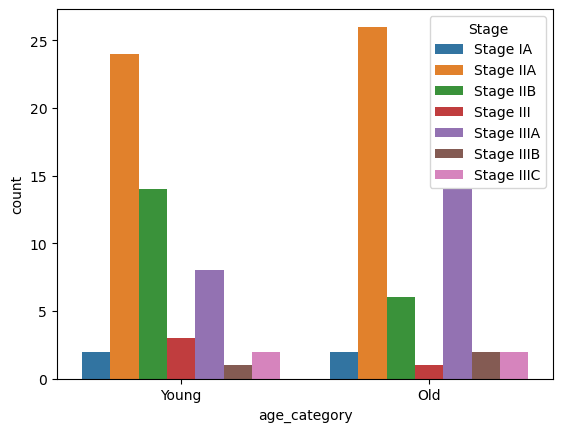

In [49]:
# 1. Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Create the age_category column in clinical_data
median_age = clinical_data['Age'].median()
clinical_data['age_category'] = np.where(clinical_data['Age'] >= median_age, 'Old', 'Young')

# 3. Filter out NaN values in "Stage"
clinical_data_filtered = clinical_data[~clinical_data['Stage'].isna()]

## this will programatically get all the stages in order
stage_categories = np.unique(clinical_data_filtered['Stage'].astype(str)) # Convert to string
assert(np.all(stage_categories == ['Stage IA', 'Stage IIA', 'Stage IIB',
                                    'Stage III', 'Stage IIIA', 'Stage IIIB', 'Stage IIIC']))

# 4. Loop through all the stage categories and count
for age_cat in ["Old", "Young"]:
    print(age_cat)
    for stage_cat in stage_categories:
        # 1. create a subset of the data frame with the old/young patients
        age_stage_data = clinical_data_filtered[(clinical_data_filtered['age_category'] == age_cat) & 
                                                (clinical_data_filtered['Stage'] == stage_cat)]
        # 2. count the number of patients with the stage of cancer and print
        num_patients = age_stage_data.shape[0]
        print(f"Number of {age_cat} patients with {stage_cat} cancer: {num_patients}")

# 5. Create a barplot to compare your results
sns.countplot(
    x="age_category",
    hue="Stage",
    hue_order=stage_categories,
    data=clinical_data_filtered
)

plt.show()


## (5) Plotting Proteomic Data

Let's explore how the proteomic expression of a gene differs between young and old patients.

**Exercise 5.1** Plot the expression data of a chosen protein stratified between patients older and younger than the median age.

In [51]:
young_mask = clinical_data['age_category'] == 'Young' # look at the columns of the clinical data to see what column to get age information
old_mask = clinical_data['age_category'] == 'Old'

young = (protein_data.loc[old_mask]).dropna()
old = (protein_data.loc[young_mask]).dropna()

data = [old.values, young.values] # our boxplot function will require an array (or an array of arrays)
data

[array([], shape=(0, 10107), dtype=float64),
 array([], shape=(0, 10107), dtype=float64)]

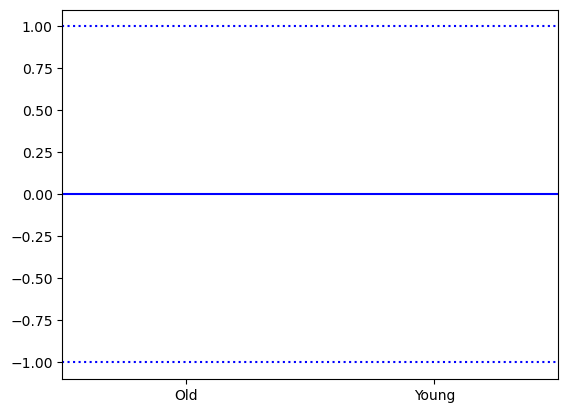

In [55]:
fig, ax = plt.subplots()

plt.axhline(y=0, color='blue', linestyle='-')
plt.axhline(y=-1, color='blue', linestyle=':')
plt.axhline(y=1, color='blue', linestyle=':')

combined_data = [old.values.flatten(), young.values.flatten()] # Combine the protein data for young and old patients into a single array

bp = ax.boxplot(combined_data)

plt.xticks([1, 2], ["Old", "Young"]) 

plt.show()


**Exercise 5.2** Why do you think we added lines at -1, 0, and 1? What do these values represent in terms of log2FoldChange?

In [ ]:
# answer in a comment here
# -1 represents a decrease in expression by a factor of 2 (or a 2-fold decrease).
# 0 represents no change in expression.
# 1 represents an increase in expression by a factor of 2 (or a 2-fold increase).

## (6) SciPy
Another question to ask is if the levels of RNA expression correlate with protein expression. While we would expect for there to be a 1:1 relationship between RNA and protein (according to the central dogma), as you will see, this is not what we oftentimes observe.

In [56]:
from scipy import stats # we are using the stats package in particular

The first thing we need to do is to identify which patients and genes are shared between the transcriptomic and proteomic data sets.

For some cancer, patients doesn't have clinical or transcriptomic data in CPTAC. We need to use intersect1d() to fix this. We also need to use intersect1d() to determine which genes are shared.

**Exercise 6.1** To make sure the data frames match:

1. Identify patients that are shared between transcriptomic and proteomics data (hint: use intersect1d()). 
2. Identify the names of the genes that are shared between the two datasets (hint: use intersect1d()). Is this data the row or column names?
3. Create the rna_shared and prot_shared data frames; ie dataframes with only genes and patients that are shared between rna and protein data. (Hint: how can we access rows/columns by name?).

In [57]:
# 1. Identify the patients shared between RNA and protein data.
shared_patients_prot = np.intersect1d(rna_data.index, protein_data.index)

# 2. Identify the genes (RNA, protein) shared between the two data sets 
shared_rna_prot = np.intersect1d(rna_data.columns, protein_data.columns)

# 3. Create the two data frames
rna_shared = rna_data.loc[shared_patients_prot, shared_rna_prot]
prot_shared = protein_data.loc[shared_patients_prot, shared_rna_prot]

Now, we can see how correlated the RNA and protein levels are. We'll use Spearman correlation from the stats library, which is spearmanr().

**Exercise 6.2** Choose a gene and get the Spearman correlation of the rna to protein of that gene.

In [59]:
# we need the nan_policy="omit" to throw out NaN values

gene_name = "TP53"

\
corr, pval = stats.spearmanr(rna_shared[gene_name], prot_shared[gene_name], nan_policy="omit")

print(f"The correlation of {gene_name} is {round(corr, 3)} (p = {round(pval, 10)}).")

The correlation of TP53 is 0.389 (p = 9.5868e-06).


**Exercise 6.3** What is your gene's Spearman correlation? What does that mean mathematically? What could this represent biologically? Look into the literature to see if it corroborates this idea.

In [ ]:
# answer in a comment here

#The Spearman correlation coefficient for (TP53) is 0.389. 
#This value indicates a positive correlation between the RNA expression levels and the protein expression levels of TP53 across the shared patient samples.

## (7) Heatmaps
**Exercise 7.1** A problem arises if we want to compare many correlations. Heatmaps are useful for visualizing a large number of comparisons. To make a heatmap, we'll use the heatmap() function from seaborn. Let's do the following:

1. Set up our data frame to hold all comparisons. All you need to do is to access the first 20 gene names.
2. Calculate the correlations for the first 20 genes (just to save time). You'll need to use two for loops.
3. Call heatmap() -- this is filled in for you!
4. Interpret the data. There is a "light" diagonal along the heatmap from the top-left to bottom-right. Is this expected? Why or why not?

In [60]:
# import seaborn as sns
import seaborn as sns


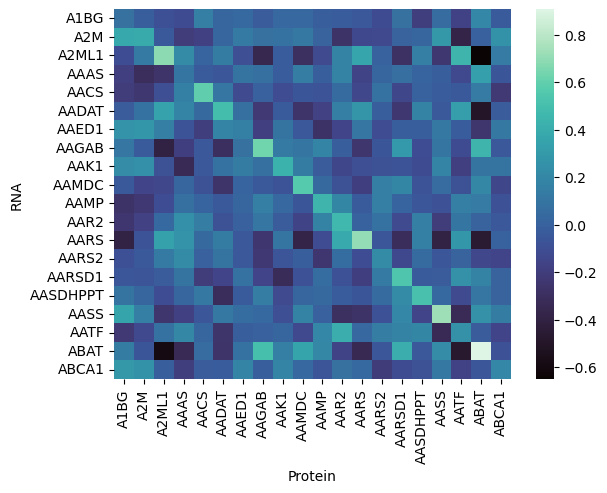

In [63]:
ncomparisons = 20
gene_names = rna_shared.columns[:ncomparisons]  # Get the first 20 gene names

# Create an empty DataFrame to hold correlation values
corr_df = pd.DataFrame(np.ndarray(shape=(ncomparisons, ncomparisons), dtype=np.float16),
                      index = gene_names,
                      columns = gene_names)

# Calculate correlations for the first 20 genes
for g1 in gene_names:
    for g2 in gene_names:
        # Calculate the correlations between protein and RNA
        corr, _ = stats.spearmanr(rna_shared[g1], prot_shared[g2], nan_policy="omit")
        # Store the correlation in corr_df
        corr_df.loc[g1, g2] = np.float16(corr)

# Create the heatmap
plot = sns.heatmap(
    corr_df,
    cmap='mako',
)
plot.set_xlabel('Protein', fontsize=10)
plot.set_ylabel('RNA', fontsize=10)
plt.show()


# 4. interpret!

## (8) More with Seaborn
seaborn is a nice package which works well with matplotlib and makes prettier plots with more control over the figure.

Here's how you make a scatter plot with seaborn, for example:

In [ ]:
fig, ax = plt.subplots()

sns.scatterplot( # x-axis
    x = clinical_data.loc[:, "Age.in.Month"],
    y = protein_data.loc[:, "DYNLT3"],# y-axis
    legend = "full",  # show the legend
    ax = ax  # necessary for when plotting more than 1 subplot
)

fig.suptitle('Age vs. DYNLT3')  # set title

plt.show()

**Exercise 8.1** Update the above plot to:

1. Have age in years instead of months.
2. Color patients based on gender (or another clinical variable of your choosing)
3. Have a side-by-side second plot with a different protein of your choosing

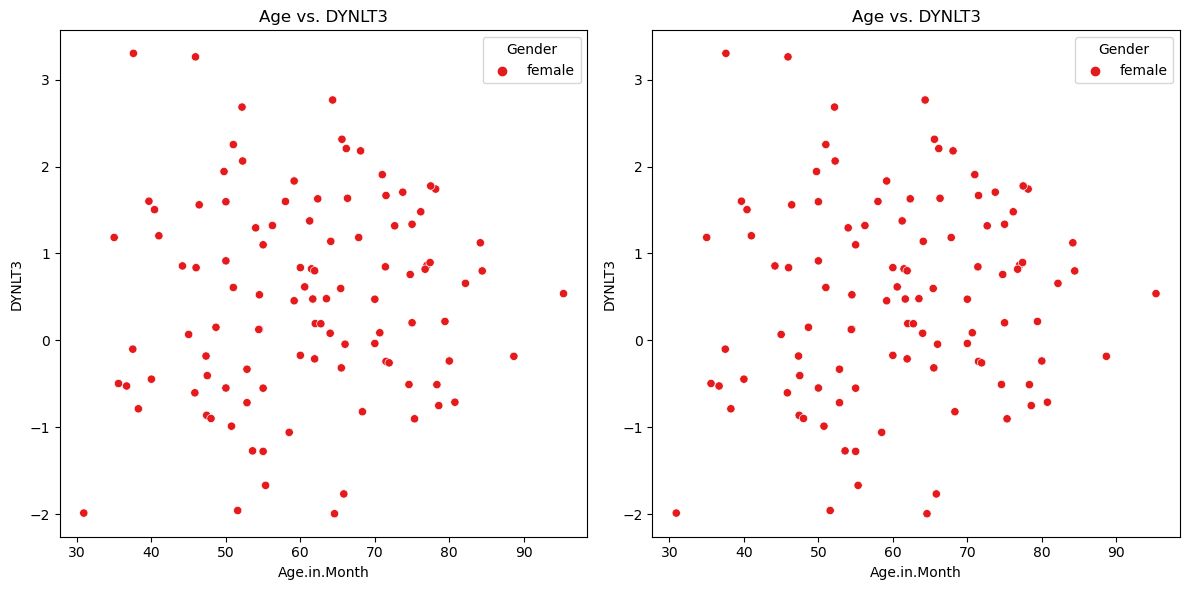

In [66]:
# create plot here

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  

sns.scatterplot(
    x=clinical_data.loc[:, "Age.in.Month"] / 12, 
    y=protein_data.loc[:, "DYNLT3"],
    hue=clinical_data.loc[:, "Gender"], 
    palette="Set1",
    legend="full",
    ax=ax1 
)
ax1.set_title('Age vs. DYNLT3')  

sns.scatterplot(
    x=clinical_data.loc[:, "Age.in.Month"] / 12, 
    y=protein_data.loc[:, "DYNLT3"],  
    hue=clinical_data.loc[:, "Gender"],  
    palette="Set1",  
    legend="full",
    ax=ax2 
)
ax2.set_title('Age vs. DYNLT3')  

plt.tight_layout()

plt.show()



## (9) Saving Plots
Remember, to save a plot, we can call plt.savefig() instead of the plt.show().

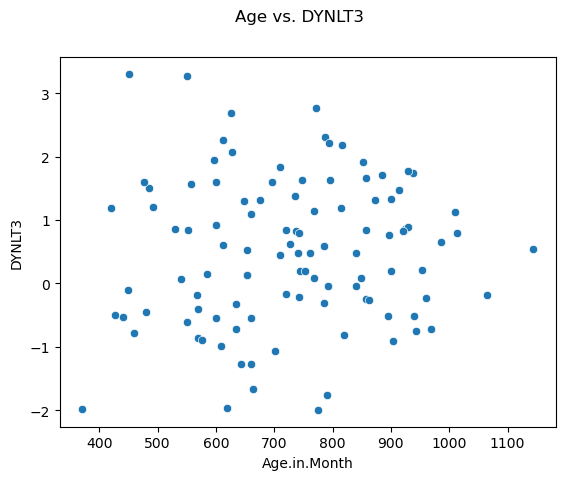

In [67]:
fig, ax = plt.subplots()

sns.scatterplot( # x-axis
    x = clinical_data.loc[:, "Age.in.Month"],
    y = protein_data.loc[:, "DYNLT3"],# y-axis
    legend = "full",  # show the legend
    ax = ax  # necessary for when plotting more than 1 subplot
)

fig.suptitle('Age vs. DYNLT3')  # set title

# age_scatter.png is a relative path so check your working directory before running it
plt.savefig('age_scatter.png', bbox_inches='tight')

# Exercises
Only this section will be graded!
## 1. Drawing Connections
1. Choose a clinical variable and segment the cohort into two groups. 
2. Find out what the 5 most differentially expressed genes are (we aren't going to do this in a sophisticated way like DESeq, instead just take the mean expression of every single gene within a group and find the gene which has the greatest difference in mean between the two groups)
3. Create two scatter plots, side by side, each with one group. Within the scatter plots, plot RNA expression versus protein expression for each of the genes in a different color.
4. Add appropriate legend, title, and labels.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


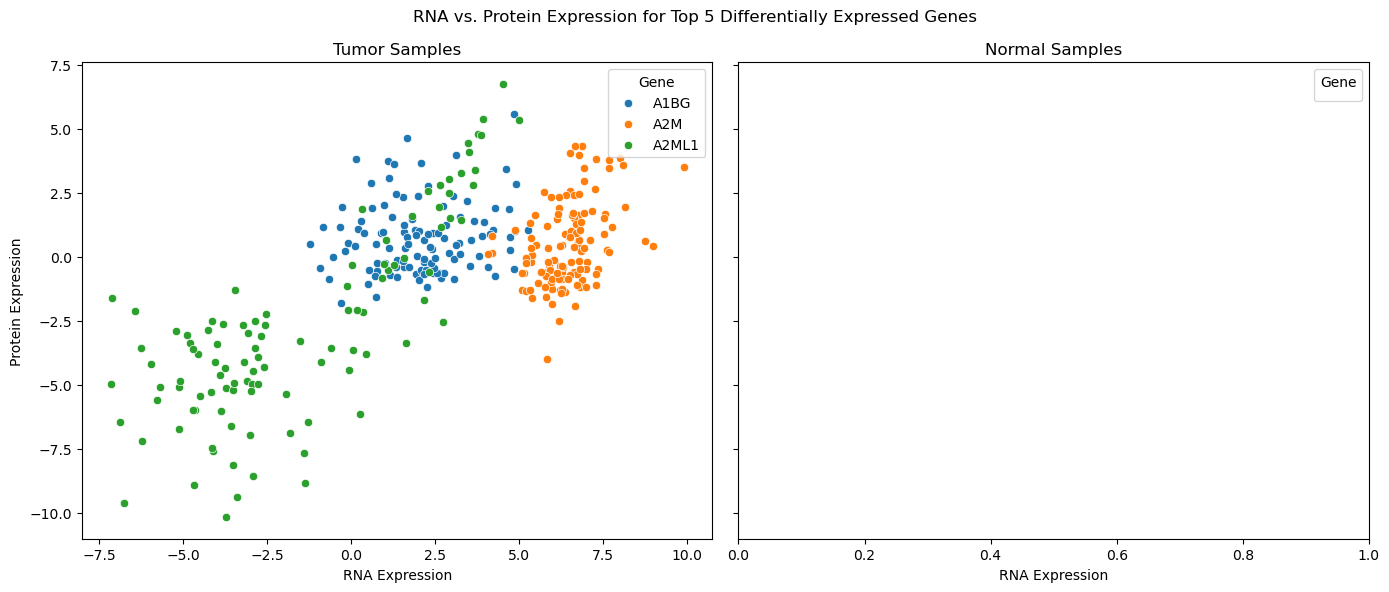

In [107]:
# answer questions here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tumor_patients = clinical_data[clinical_data['Sample_Tumor_Normal'] == 'Tumor'].index
normal_patients = clinical_data[clinical_data['Sample_Tumor_Normal'] == 'Normal'].index

mean_expr_tumor = rna_data.loc[tumor_patients].mean()
mean_expr_normal = rna_data.loc[normal_patients].mean()

diff_expr = (mean_expr_tumor - mean_expr_normal).abs()

top_5_genes = diff_expr.nlargest(5).index

def plot_scatter(group_patients, group_name, ax_index, top_5_genes, rna_data, protein_data):
    for gene in top_5_genes:
        if gene in rna_data.columns and gene in protein_data.columns:
            sns.scatterplot(ax=axes[ax_index], 
                            x=rna_data.loc[group_patients, gene], 
                            y=protein_data.loc[group_patients, gene], 
                            label=gene)
    axes[ax_index].set_title(f'{group_name} Samples')
    axes[ax_index].set_xlabel('RNA Expression')
    if ax_index == 0:
        axes[ax_index].set_ylabel('Protein Expression')
    axes[ax_index].legend(title='Gene')

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig.suptitle('RNA vs. Protein Expression for Top 5 Differentially Expressed Genes')

plot_scatter(tumor_patients, 'Tumor', 0, top_5_genes, rna_data, protein_data)
plot_scatter(normal_patients, 'Normal', 1, top_5_genes, rna_data, protein_data)

plt.tight_layout()
plt.show()


## 2. Interpretation Skills
This section is short-answer based written responses. Please respond in 2-3 sentences to each question below for full credit.
1. What do the numbers within the protein and transcriptomics DataFrames represent? Why do we represent them this way?
2. Why are there fewer columns in the protein DataFrame than the transcriptomics one?
3. Explain how the central dogma may be broken in between DNA -> RNA -> Proteins and how this might affect our proteomics data.
5. Why is proteomics data relatively scarce compared to sequencing data?
6. Should we ever expect protein expression to be 0 in a tumor sample?
7. What are protein domains and how do they relate to the role of a protein?


In [83]:
# write code here

1. The numbers represent the expression levels, like a measure of how active or present certain proteins or RNA transcripts are in 
a sample, relative to their baseline. This allows researchers to pinpoint which proteins or genes are over- or under-expressed in different conditions.

2. The reason there are fewer proteins listed compared to RNA transcripts is because not every transcript gets translated into a protein, 
and the process of detecting and quantifying proteins is inherently more complex. This iss due to technical and biological factors, such as the 
presence of various post-translational modifications.

3. The classic flow of genetic information (DNA -> RNA -> Protein) isn't always straightforward. RNA splicing, RNA editing, and 
post-translational modifications can lead to a variety of outcomes from a single gene sequence, introducing complexity that might not 
be directly inferred from RNA data alone. This can sometimes make proteomics data seem less predictable when compared to transcriptomic.

4. Compared to genomic and transcriptomic data, proteomic datasets are less abundant, mainly due to the higher technical challenges 
and costs associated with proteomics studies. The vast dynamic range of protein expression, alongside the technicalities involved in 
detecting low-abundance proteins and post-translational modifications, contributes to the relative lack of comprehensive 
proteomics datasets.

5. While unusual, it is possible for specific proteins to have 0 expression in a tumor samples, especially if their corresponding genes 
are silenced through various regulatory mechanisms or if the proteins are degraded. It's important to consider the complexity of 
cellular regulation and protein stability.

6.  Protein domains represent functional or structural units within proteins that contribute to their overall activity and interactions. 
Each domain can be thought of as a modular component that endows the protein with specific capabilities, each with individual tools within 
a larger setting. Understanding these domains is crucial for understanding the protein's function and the potential impact of mutations 
or alterations within these domains on cellular processes.

## 3. Challenge Exercise - Incorporating Genomics
This exercise is optional and is worth extra credit up to 5 points. The combined extra credit between challenge exercises will cap out at 5 points total.
<br></br>
We can get somatic mutation data for cptac patients the same way we get proteomics, transcriptomical, or clinical. Let's explore some aspects of it.
1. Save the cancer somatic mutation data to `mutation_data`
2. Determine the top 10 most commonly mutated genes within the dataset.
3. Determine what percent of patients have a mutation in at least one of those genes.
4. Create a bar plot that shows percent percent of patients that have exactly 0-10 out of 10 of those mutations. Name axes and titles appropriately.

In [117]:
# write code here
import cptac
import matplotlib.pyplot as plt

cptac.download('brca')
brca = cptac.Brca()

mutation_data = brca.get_somatic_mutation()

mutation_counts = mutation_data['Gene'].value_counts()
top_10_genes = mutation_counts.head(10).index.tolist()

patients_with_mutation = mutation_data[mutation_data['Gene'].isin(top_10_genes)]['Patient_ID'].unique()
percent_with_mutation = len(patients_with_mutation) / len(mutation_data['Patient_ID'].unique()) * 100

mutation_data_top_10 = mutation_data[mutation_data['Gene'].isin(top_10_genes)]
mutation_counts_per_patient = mutation_data_top_10.groupby('Patient_ID').size()
mutation_counts_distribution = mutation_counts_per_patient.value_counts().reindex(range(11), fill_value=0)
mutation_percent_distribution = (mutation_counts_distribution / len(mutation_data['Patient_ID'].unique())) * 100

plt.bar(mutation_percent_distribution.index, mutation_percent_distribution.values)
plt.xlabel('Number of Mutations in Top 10 Genes')
plt.ylabel('Percentage of Patients')
plt.title('Distribution of Mutations in Top 10 Genes Among Patients')
plt.xticks(range(11))
plt.show()



KeyError: 'Patient_ID'